In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pandas as pd
import scipy.stats as sci
import numpy as np
import seaborn as sns

In [2]:
df=pd.read_csv('NFA 2018.csv')
df.head(20)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,Percapita GDP (2010 USD),population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


In [3]:
df.rename(columns={'Percapita GDP (2010 USD)':'gdp'},inplace=True)
# df = df.drop(['ISO alpha-3 code', 'UN_region', 'UN_subregion', 'record', 'total'], axis=1)
# df.dropna().head(100)
df.loc[(df!='0.000000').any(1)]
df.head(100)

/Users/mackenziemitchell/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,gdp,population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,1.350234e-01,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,4.657633e+05,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,1.891373e-01,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,6.524291e+05,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,2.283036e-03,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7.875332e+03,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,5.639689e-02,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,1.945411e+05,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,1.350234e-01,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,4.657633e+05,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


In [4]:
df.dropna(inplace=True)
df.head(20)

,country,ISO alpha-3 code,UN_region,UN_subregion,year,record,crop_land,grazing_land,forest_land,fishing_ground,built_up_land,carbon,total,gdp,population
0,Armenia,ARM,Asia,Western Asia,1992,BiocapPerCap,1.611286e-01,0.135023,0.083836,0.013718,0.033669,0.000000e+00,4.273741e-01,949.033,3449000
1,Armenia,ARM,Asia,Western Asia,1992,BiocapTotGHA,5.558130e+05,465763.337400,289190.662300,47320.224590,116139.598200,0.000000e+00,1.474227e+06,949.033,3449000
2,Armenia,ARM,Asia,Western Asia,1992,EFConsPerCap,3.909225e-01,0.189137,0.000001,0.004138,0.033669,1.112225e+00,1.730092e+00,949.033,3449000
3,Armenia,ARM,Asia,Western Asia,1992,EFConsTotGHA,1.348487e+06,652429.066600,4.327841,14272.803690,116139.598200,3.836620e+06,5.967954e+06,949.033,3449000
4,Armenia,ARM,Asia,Western Asia,1992,EFExportsPerCap,1.124910e-03,0.002283,0.000000,0.000438,0.000000,4.819043e-02,5.203676e-02,949.033,3449000
5,Armenia,ARM,Asia,Western Asia,1992,EFExportsTotGHA,3.880378e+03,7875.331688,0.000000,1512.195296,0.000000,1.662329e+05,1.795008e+05,949.033,3449000
6,Armenia,ARM,Asia,Western Asia,1992,EFImportsPerCap,2.309189e-01,0.056397,0.000001,0.003312,0.000000,8.791121e-02,3.785406e-01,949.033,3449000
7,Armenia,ARM,Asia,Western Asia,1992,EFImportsTotGHA,7.965547e+05,194541.060900,4.327841,11426.058040,0.000000,3.032497e+05,1.305776e+06,949.033,3449000
8,Armenia,ARM,Asia,Western Asia,1992,EFProdPerCap,1.611286e-01,0.135023,0.000000,0.001264,0.033669,1.072504e+00,1.403588e+00,949.033,3449000
9,Armenia,ARM,Asia,Western Asia,1992,EFProdTotGHA,5.558130e+05,465763.337400,0.000000,4358.940944,116139.598200,3.699604e+06,4.841678e+06,949.033,3449000


In [5]:
dfa=df.groupby(['country','year']).mean()
dfa.head(10)

crop_land  grazing_land    forest_land  fishing_ground  \
country     year                                                              
Afghanistan 2002  1.810901e+06  1.642907e+06  433120.155995      333.699499   
            2003  2.059523e+06  1.626436e+06  445218.987752      321.228137   
            2004  1.661855e+06  1.654860e+06  465634.478812      482.017876   
            2005  2.480115e+06  1.498199e+06  469062.638830     1017.231779   
            2006  2.149060e+06  1.541828e+06  479177.687925      662.663244   
            2007  2.617570e+06  1.453172e+06  486855.464278      614.240923   
            2008  2.001278e+06  1.726903e+06  475975.151223     1141.343182   
            2009  2.886844e+06  1.585469e+06  499312.100077      901.628154   
            2010  2.673877e+06  1.788142e+06  508390.829595     1367.499481   
            2011  2.235733e+06  1.776044e+06  525817.099287     1658.150592   

                  built_up_land        carbon         total      gdp  \
country     year                                                       
Afghanistan 2002  191566.141175  2.043294e+05  4.283157e+06  364.571   
            2003  233201.745281  2.058630e+05  4.570564e+06  376.759   
            2004  189196.380731  1.971168e+05  4.169144e+06  364.095   
            2005  296611.046916  2.409220e+05  4.985927e+06  389.416   
            2006  259923.859711  2.689310e+05  4.699583e+06  397.986   
            2007  333628.103993  3.222066e+05  5.214046e+06  440.368   
            2008  230646.680664  4.665818e+05  4.902525e+06  444.950   
            2009  375914.585117  6.554183e+05  6.003860e+06  524.824   
            2010  363806.305011  8.505726e+05  6.186156e+06  553.300   
            2011  287110.199796  1.140741e+06  5.967103e+06  569.233   

                  population  
country     year              
Afghanistan 2002    21487000  
            2003    22507000  
            2004    23500000  
            2005    24400000  
            2006    25184000  
            2007    25878000  
            2008    26529000  
            2009    27207000  
            2010    27962000  
            2011    28809000

In [6]:
dfg=df.groupby(['country','year','gdp','population']).sum()
dfg.sort_values(by='year')
dfg.head(20)

crop_land  grazing_land  \
country     year gdp      population                               
Afghanistan 2002 364.571  21487000    1.810901e+07  1.642907e+07   
            2003 376.759  22507000    2.059523e+07  1.626436e+07   
            2004 364.095  23500000    1.661855e+07  1.654860e+07   
            2005 389.416  24400000    2.480115e+07  1.498199e+07   
            2006 397.986  25184000    2.149060e+07  1.541828e+07   
            2007 440.368  25878000    2.617570e+07  1.453172e+07   
            2008 444.950  26529000    2.001278e+07  1.726903e+07   
            2009 524.824  27207000    2.886844e+07  1.585469e+07   
            2010 553.300  27962000    2.673877e+07  1.788142e+07   
            2011 569.233  28809000    2.235733e+07  1.776044e+07   
            2012 630.427  29727000    2.681431e+07  1.807441e+07   
            2013 621.818  30682000    2.752601e+07  1.767711e+07   
            2014 610.242  31628000    2.826965e+07  1.781140e+07   
Albania     1980 2110.630 2681000     4.097990e+06  1.766437e+06   
            1981 2187.640 2735000     4.216036e+06  1.752743e+06   
            1982 2205.050 2788000     4.420633e+06  1.743326e+06   
            1983 2182.630 2843000     5.054779e+06  1.758460e+06   
            1984 2110.440 2902000     4.860556e+06  1.774721e+06   
            1985 2104.310 2967000     4.955772e+06  1.726205e+06   
            1986 2180.370 3041000     5.050580e+06  1.700586e+06   

                                       forest_land  fishing_ground  \
country     year gdp      population                                 
Afghanistan 2002 364.571  21487000    4.331202e+06     3336.994992   
            2003 376.759  22507000    4.452190e+06     3212.281368   
            2004 364.095  23500000    4.656345e+06     4820.178763   
            2005 389.416  24400000    4.690626e+06    10172.317787   
            2006 397.986  25184000    4.791777e+06     6626.632435   
            2007 440.368  25878000    4.868555e+06     6142.409231   
            2008 444.950  26529000    4.759752e+06    11413.431816   
            2009 524.824  27207000    4.993121e+06     9016.281543   
            2010 553.300  27962000    5.083908e+06    13674.994813   
            2011 569.233  28809000    5.258171e+06    16581.505916   
            2012 630.427  29727000    5.134143e+06     9062.990587   
            2013 621.818  30682000    5.075381e+06    16502.122682   
            2014 610.242  31628000    5.057838e+06    15672.339284   
Albania     1980 2110.630 2681000     3.247978e+06   288680.342029   
            1981 2187.640 2735000     3.247816e+06   288967.482571   
            1982 2205.050 2788000     3.254305e+06   287591.731184   
            1983 2182.630 2843000     3.261415e+06   299447.640801   
            1984 2110.440 2902000     3.264930e+06   288415.722014   
            1985 2104.310 2967000     3.254387e+06   300809.234034   
            1986 2180.370 3041000     3.246675e+06   299844.073164   

                                      built_up_land        carbon  \
country     year gdp      population                                
Afghanistan 2002 364.571  21487000     1.915661e+06  2.043294e+06   
            2003 376.759  22507000     2.332017e+06  2.058630e+06   
            2004 364.095  23500000     1.891964e+06  1.971168e+06   
            2005 389.416  24400000     2.966110e+06  2.409220e+06   
            2006 397.986  25184000     2.599239e+06  2.689310e+06   
            2007 440.368  25878000     3.336281e+06  3.222066e+06   
            2008 444.950  26529000     2.306467e+06  4.665818e+06   
            2009 524.824  27207000     3.759146e+06  6.554183e+06   
            2010 553.300  27962000     3.638063e+06  8.505726e+06   
            2011 569.233  28809000     2.871102e+06  1.140741e+07   
            2012 630.427  29727000     3.935738e+06  1.018650e+07   
            2013 621.818  30682000     4.107329e+06  1.036128e+07   
            2014 610.242  31628000   

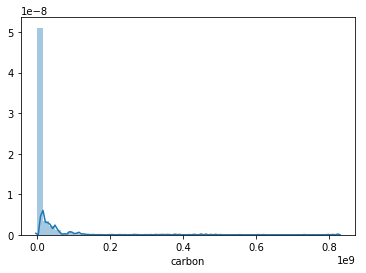

In [7]:
# plt.scatter(df.year,df.carbon)
# plt.title('Year vs. Carbon Levels')
# plt.xlabel('Year')
# plt.ylabel("Carbon Levels")
sns.distplot(dfa.carbon)

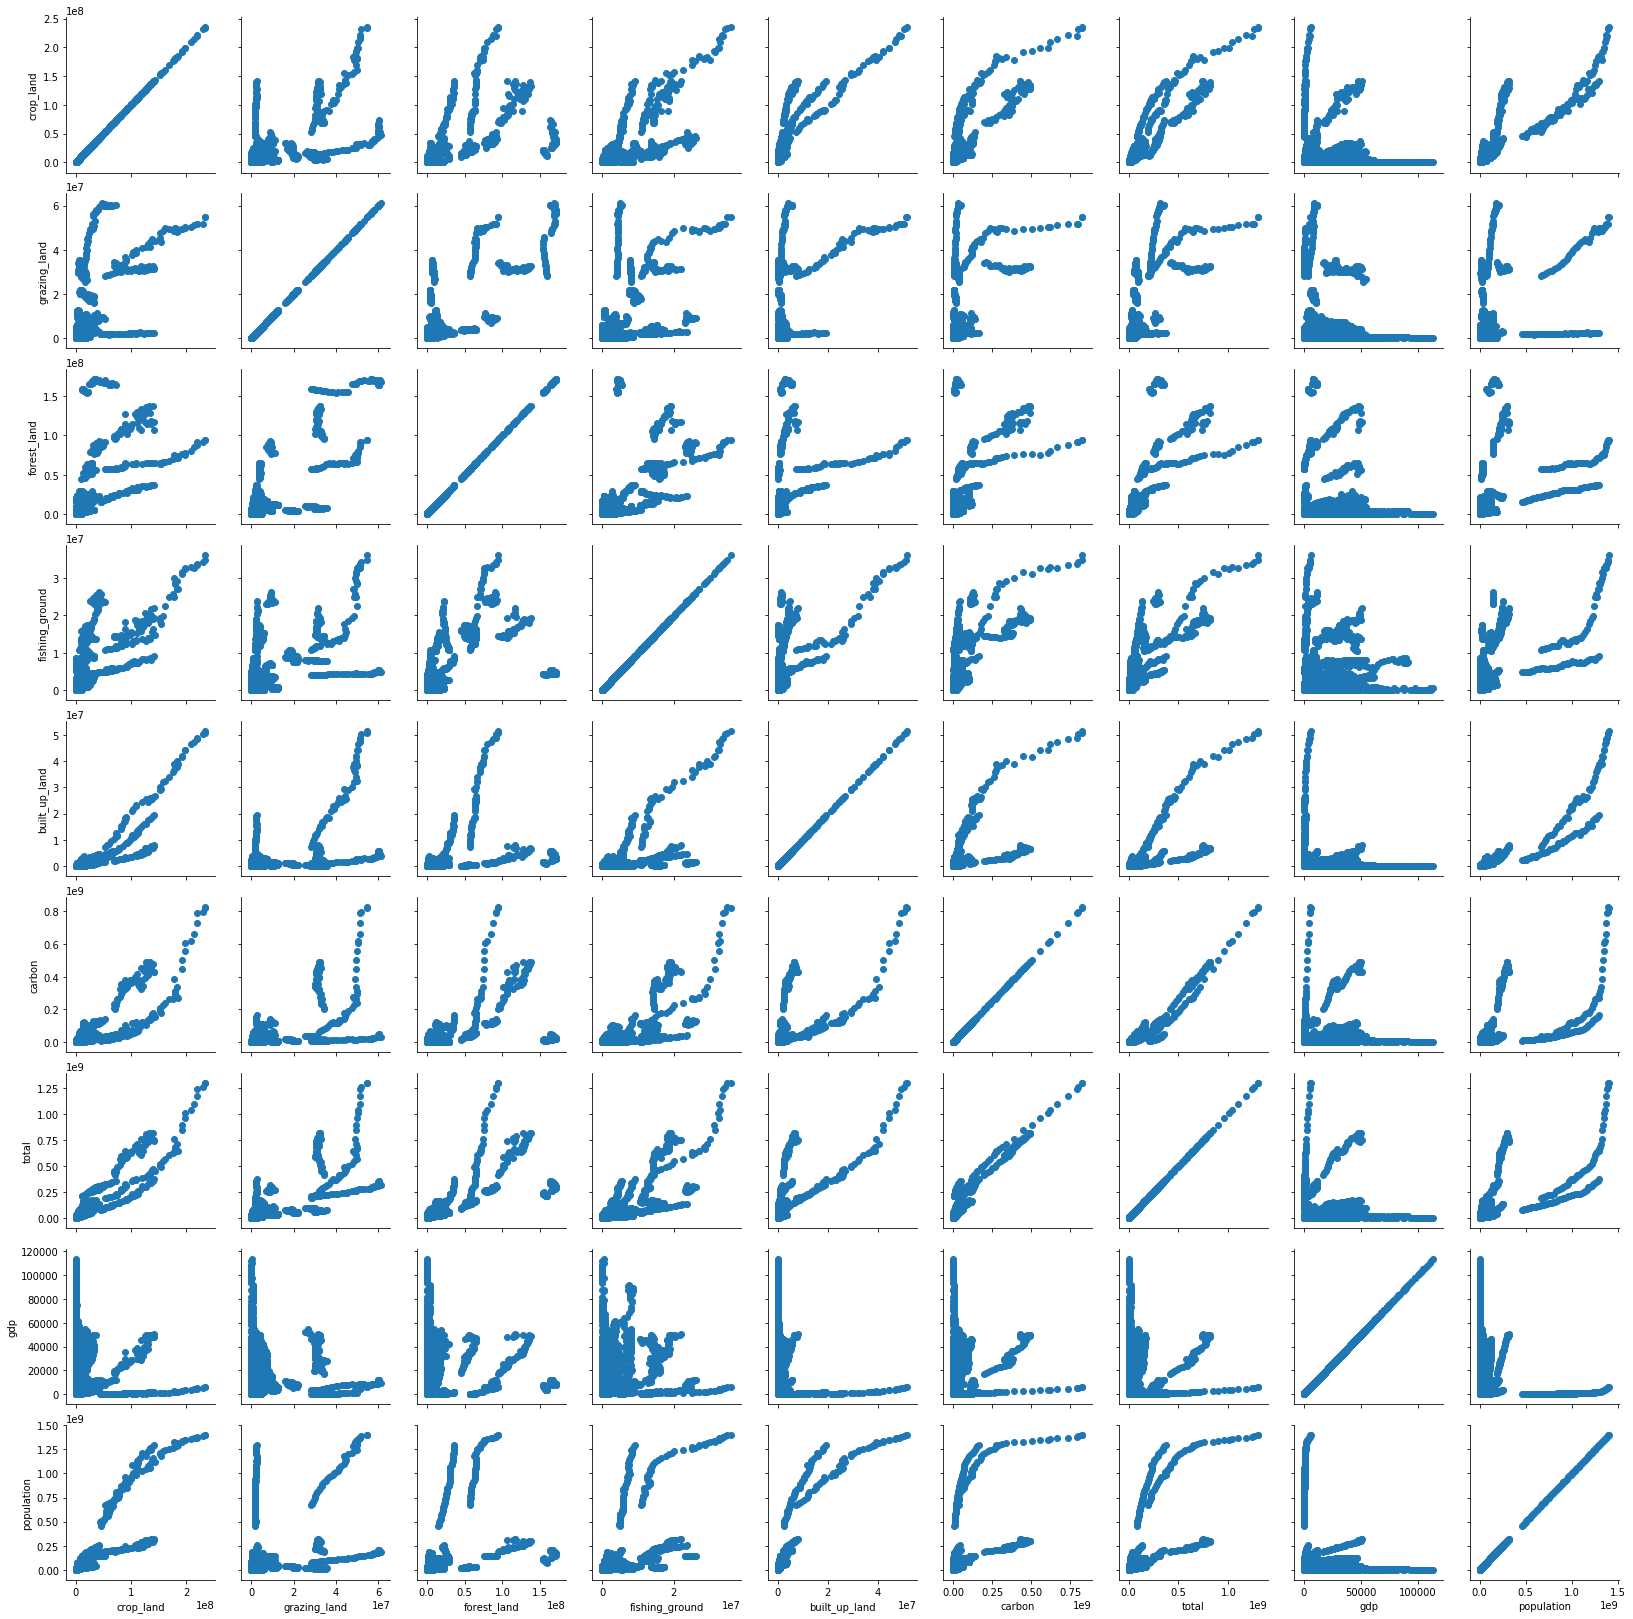

In [8]:
# sns.pairplot(data=dfa)
sns.PairGrid(dfa).map(plt.scatter)

In [9]:
model=smf.ols('carbon~crop_land+built_up_land+grazing_land',data=dfa).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 carbon   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4948.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:06:40   Log-Likelihood:            -1.0082e+05
No. Observations:                5433   AIC:                         2.017e+05
Df Residuals:                    5429   BIC:                         2.017e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.772e+06   4.13e+05     -6.714      0.000   -3.58e+06   -1.96e+06
crop_land         2.5313      0.040     63.797      0.000       2.454       2.609
built_up_land    -2.7028      0.229    -11.808      0.000      -3.152      -2.254
grazing_land      0.0177      0.063      0.278      0.781      -0.107       0.142
==============================================================================
Omnibus:                     2785.911   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381110.166
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                      43.931   Cond. No.                     2.57e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

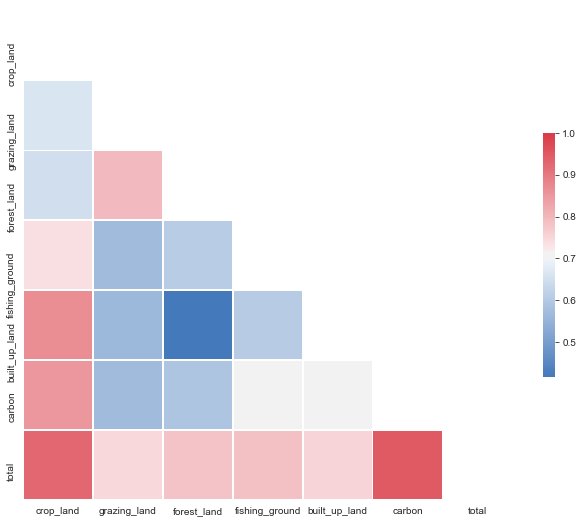

In [10]:
corr=dfg.corr()
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)


CorrMtx(corr, dropDuplicates = True)

In [11]:
model = smf.ols(formula='carbon~crop_land+grazing_land+forest_land+fishing_ground+built_up_land', data=dfg).fit()
model = smf.ols(formula='carbon~grazing_land+built_up_land+crop_land', data=dfg).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 carbon   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     4948.
Date:                Wed, 28 Aug 2019   Prob (F-statistic):               0.00
Time:                        11:06:40   Log-Likelihood:            -1.1333e+05
No. Observations:                5433   AIC:                         2.267e+05
Df Residuals:                    5429   BIC:                         2.267e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.772e+07   4.13e+06     -6.714      0.000   -3.58e+07   -1.96e+07
grazing_land      0.0177      0.063      0.278      0.781      -0.107       0.142
built_up_land    -2.7028      0.229    -11.808      0.000      -3.152      -2.254
crop_land         2.5313      0.040     63.797      0.000       2.454       2.609
==============================================================================
Omnibus:                     2785.911   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           381110.166
Skew:                           1.431   Prob(JB):                         0.00
Kurtosis:                      43.931   Cond. No.                     2.57e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.57e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""